In [2]:
#importing the modules
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
oli = datasets.fetch_olivetti_faces()
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
 type(oli)

sklearn.utils.Bunch

In [5]:
data = oli["data"]
data.shape

(400, 4096)

In [6]:
images = oli["images"]
images.shape

(400, 64, 64)

In [8]:
target = oli["target"]

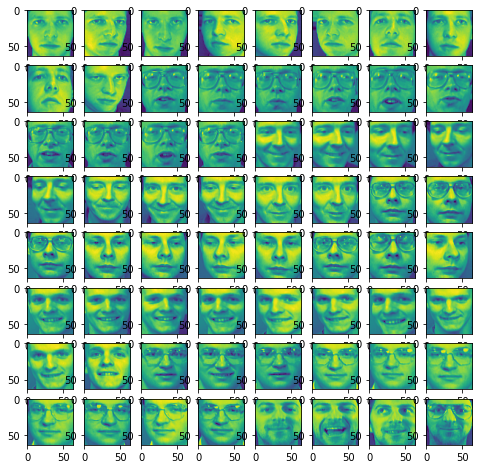

In [17]:
#plotting the images
pplt = plt.figure(figsize = (8 , 8))
for i in range(64):
    ax = pplt.add_subplot(8 , 8 , i+1)
    ax.imshow(oli.images[i])

## Transforming the data using PCA

In [40]:
#transforming the data using PCA without specifying the number of features/components
clf = PCA()
aux_data = clf.fit_transform(data)
aux_data.shape

(400, 400)

In [27]:
#finding the number of features we want 
currSum = 0
k = 0
per = 0.99
totalSum = sum(clf.explained_variance_)
while(currSum/totalSum < per):
    currSum += clf.explained_variance_[k]
    k = k+1
k

260

In [33]:
pca = PCA(n_components = k)
new_data = pca.fit_transform(data)
new_data.shape

(400, 260)

## Reproducing the images from the transformed data

In [35]:
#reverse transformation of the data and reshaping the components again from 260 to 4096
reverse_transform = pca.inverse_transform(new_data)
reverse_transform.shape

(400, 4096)

In [36]:
#each image is 64*64 pixels and reshaping the 1d array of 4096 to 64 * 64
x_images = reverse_transform.reshape(400 , 64 , 64)


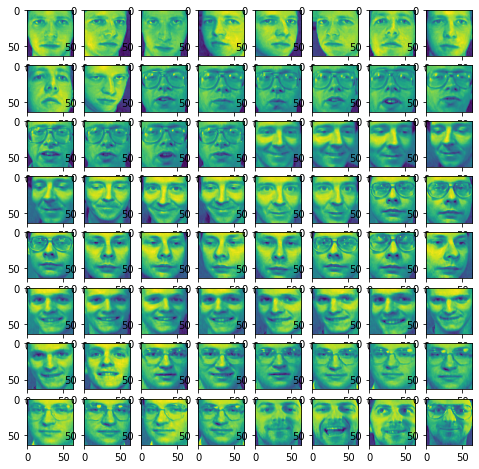

In [37]:
#plotting the images 
ax_plt = plt.figure(figsize = (8 , 8))
for i in range(64):
    axp = ax_plt.add_subplot(8 , 8 , i+1)
    axp.imshow(x_images[i])